In [184]:
import numpy as np

with open('data/IRMAR-2017-2018.txt') as f:
    data = f.readlines()

org_catalog = ['AGRO', 'INSA', 'R1', 'R2', 'INRIA', 'EXT', 'ENS', 'CNRS']
pos_catalog = ['PR', 'CR', 'DOC', 'MC', 'DR', 'MC-HDR', 'CR-HDR', 'PE',
               'PDOC', 'ADMG', 'TC', 'IR', 'IE', 'AI', 'AGPREP', 'ATER,DOC',
               'ADMG', 'ADM-UFR', 'PRAG', 'CH', 'ADMP', 'CH-HDR', 'ATER', 'LOG']

names, phones, offices, orgs, positions, teams = [], [], [], [], [], []
for m, line in enumerate(data):

    member = line.strip()
    i = member.index('+')
    name = member[:i]
    names.append(name)
    phones.append(member[i:i+17].replace(' ',''))
    remind = member[i+17:].split()
    office = 'NA'
    organization = 'R1'
    team = ['NA']

    # office
    if remind[0].isdigit() or '/' in remind[0]:
        offices.append(remind[0])
        office = remind[0]
        remind.pop(0)
    else:
        offices.append('NA')

    # organization
    if len(remind) > 0 and remind[0] in org_catalog:
        orgs.append(remind[0])
        organization = remind[0]
        remind.pop(0)
    else:
        orgs.append('R1')

    # position
    if len(remind) > 0 and remind[0] in pos_catalog:
        positions.append(remind[0])
        position = remind[0]
        remind.pop(0)
    else:
        position = 'NA'
        positions.append('NA')

    # team
    if len(remind) > 0:
        team = remind[-1].split(',')
        if len(team) == 2:
            teams.append(tuple(team))
        else:
            teams.append(tuple(team+['NA']))
    else:
        teams.append(('ADM','NA'))

irmar = np.zeros(len(data),
dtype={'names': ['name', 'phone', 'office', 'organization', 'position', 'hdr', 'team1', 'team2'],
       'formats': ['U30', 'U17', 'U7', 'U5', 'U6', '?', 'U9', 'U9']})

In [185]:
irmar['name'] = names
irmar['phone'] = phones
irmar['office'] = offices
irmar['organization'] = orgs

def _hdr(position):
    return any(x in position for x in ['HDR','PR','DR','PE'])
    
irmar['hdr'] = [ _hdr(position) for position in positions]
irmar['position'] = [position.replace('-HDR','') for position in positions]
irmar['team1'] = [team[0] for team in teams]
irmar['team2'] = [team[1] for team in teams]

In [186]:
import pandas as pd
df = pd.DataFrame(irmar)
df['position'] = df.position.astype('category')
df['team1'] = df.team1.astype('category')
df['team2'] = df.team2.astype('category')
df['organization'] = df.organization.astype('category')
df['hdr'] = df.hdr.astype('bool')

- Combien d'enseignants-chercheurs habilités à diriger des recherches ?

In [187]:
len(df[df.hdr])

103

- Combien d'enseignants-chercheurs de Rennes 1 ?

In [188]:
len(df[df.organization == 'R2'])

11

In [202]:
df.loc[df['name'].str.contains("Guevel")]

,name,phone,office,organization,position,hdr,team1,team2
142,Le Guevel Ronan,+33299141800,NA,R2,MC,False,PROC-STOC,STAT


- Liste des MC de STATS

In [204]:
df.loc[df.position == 'MC'].loc[(df.team1 == 'STAT') | (df.team2 == 'STAT')]

,name,phone,office,organization,position,hdr,team1,team2
17,Bennani-Dosse Mohammed,+33299141796,NA,R2,MC,False,STAT,NA
42,Chagneau Pierrette,+33223238528,NA,INSA,MC,False,STAT,NA
46,Chauvet Guillaume,+33299053233,NA,R1,MC,True,STAT,NA
55,Cornillon Pierre-André,+33299141819,NA,R2,MC,False,STAT,NA
83,Emily Mathieu,+33299141807,121,R1,MC,True,STAT,NA
85,Etienne Marie-Pierre,+33223485874,NA,R1,MC,False,STAT,NA
93,Gares Valérie,+33223238948,NA,INSA,MC,False,STAT,NA
96,Giacofci Joyce Madison,+33299141800,NA,R2,MC,False,STAT,NA
130,Klutchnikoff Nicolas,+33299141819,NA,R2,MC,False,STAT,NA
131,Krell Nathalie,+33223236000,305,R1,MC,False,STAT,NA


In [239]:
df.loc[df.position != 'DOC'].hdr.sum()/df.loc[df.position != 'DOC'].hdr.count()*100

56.59340659340659

In [241]:
df.position

0         DOC
1          MC
2         DOC
3          MC
4          MC
5          PR
6          MC
7          MC
8          CR
9          PR
10         PR
11         MC
12        DOC
13        DOC
14         MC
15        DOC
16         PR
17         MC
18        DOC
19         PE
20        DOC
21        DOC
22         CR
23         MC
24         MC
25         MC
26        DOC
27         PR
28         PR
29         PR
        ...  
214       DOC
215       DOC
216        TC
217        CR
218        MC
219        PE
220        MC
221        PR
222        PR
223        PR
224      PRAG
225        DR
226        MC
227        MC
228      PDOC
229       DOC
230        MC
231        MC
232       DOC
233        PR
234       LOG
235      ADMG
236        MC
237       DOC
238        PR
239        MC
240        CR
241        PE
242       DOC
243    ATER,D
Name: position, Length: 244, dtype: category
Categories (20, object): [ADM-UF, ADMG, ADMP, AGPREP, ..., PE, PR, PRAG, TC]

In [252]:
res = pd.DataFrame()
for position in ['DOC','PR','MC','CR','DR']:
    res[position] = df.loc[df.position == position].groupby('team1').name.count()

In [266]:
res = res.drop(['INFO','IREM','BIBLI','ADM'])

ValueError: labels ['INFO' 'IREM' 'BIBLI' 'ADM'] not contained in axis

In [269]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)

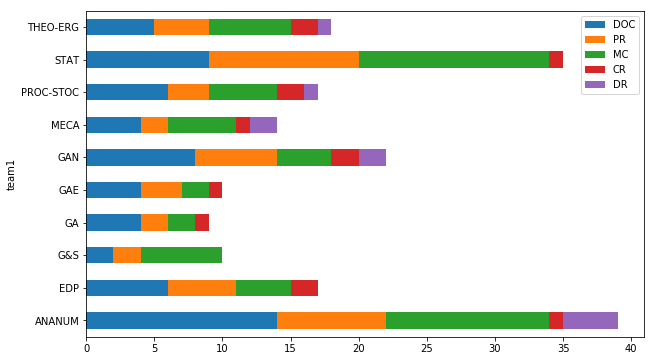

In [271]:
res.plot.barh(stacked=True)

In [265]:
df.loc[any(df.position == 'MC'].count()

name            62
phone           62
office          62
organization    62
position        62
hdr             62
team1           62
team2           62
dtype: int64

In [272]:
df.office

0        214
1        209
2        301
3        320
4        302
5        835
6        110
7        734
8        331
9        235
10       307
11       615
12        NA
13       634
14        NA
15        NA
16        NA
17        NA
18       214
19       601
20       610
21       202
22       211
23       612
24       614
25       109
26        NA
27       308
28        NA
29        NA
       ...  
214       NA
215    202/1
216      131
217       NA
218       NA
219      633
220      305
221      604
222      607
223      109
224      432
225      318
226      207
227      106
228      313
229      634
230      834
231       NA
232      206
233      606
234    215/1
235      033
236      231
237      621
238    210/1
239      732
240      309
241      211
242      313
243      610
Name: office, Length: 244, dtype: object